# Life Expectancy Prediction Project

## Step 1: Importing Libraries and Loading the Dataset

In this step, essential libraries are imported for data manipulation, visualization, machine learning, and evaluation. The Life Expectancy dataset is then loaded for further analysis and model development.


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Scikit-learn preprocessing and modeling
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("life_expectancy_data.csv")

## Step 2: Initial Data Exploration and Visualization
The dataset is examined to understand its structure, distribution of variables, presence of missing values, and potential outliers. Basic statistical summaries and visualizations are employed to guide subsequent preprocessing steps.


In [5]:
data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness__1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling,Smoking_Rate
0,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5,39.2
1,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9,38.2
2,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,37.2
3,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5,36.2
4,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,35.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   Infant_Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_Expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five_Deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under-Five_Deaths,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness__1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling,Smoking_Rate
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,24.740061
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,11.074649
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,4.300000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,15.860000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,24.080000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,32.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,68.000000


In [8]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under-Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness__1-19_Years                34
Thinness_5-9_Years                  34
Income_Composition_Of_Resources    167
Schooling                          163
Smoking_Rate                         0
dtype: int64

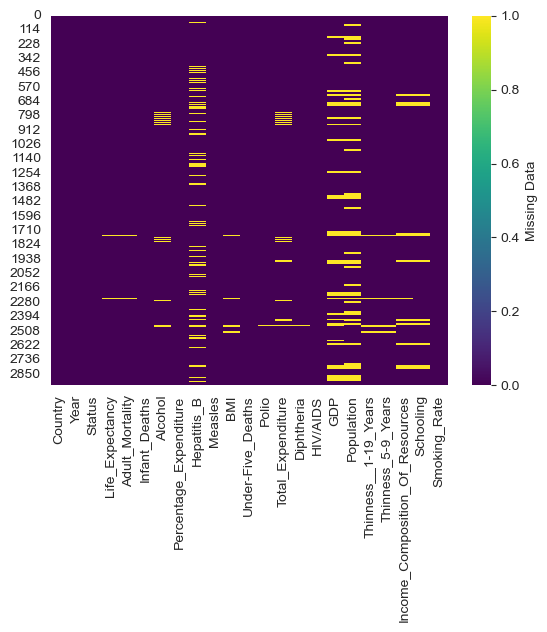

In [9]:
# Visualize missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.show()

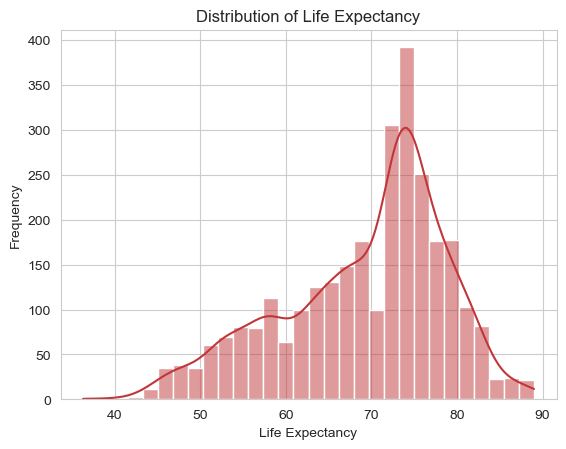

In [10]:
# Life Expectancy distribution
sns.histplot(data['Life_Expectancy'], kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

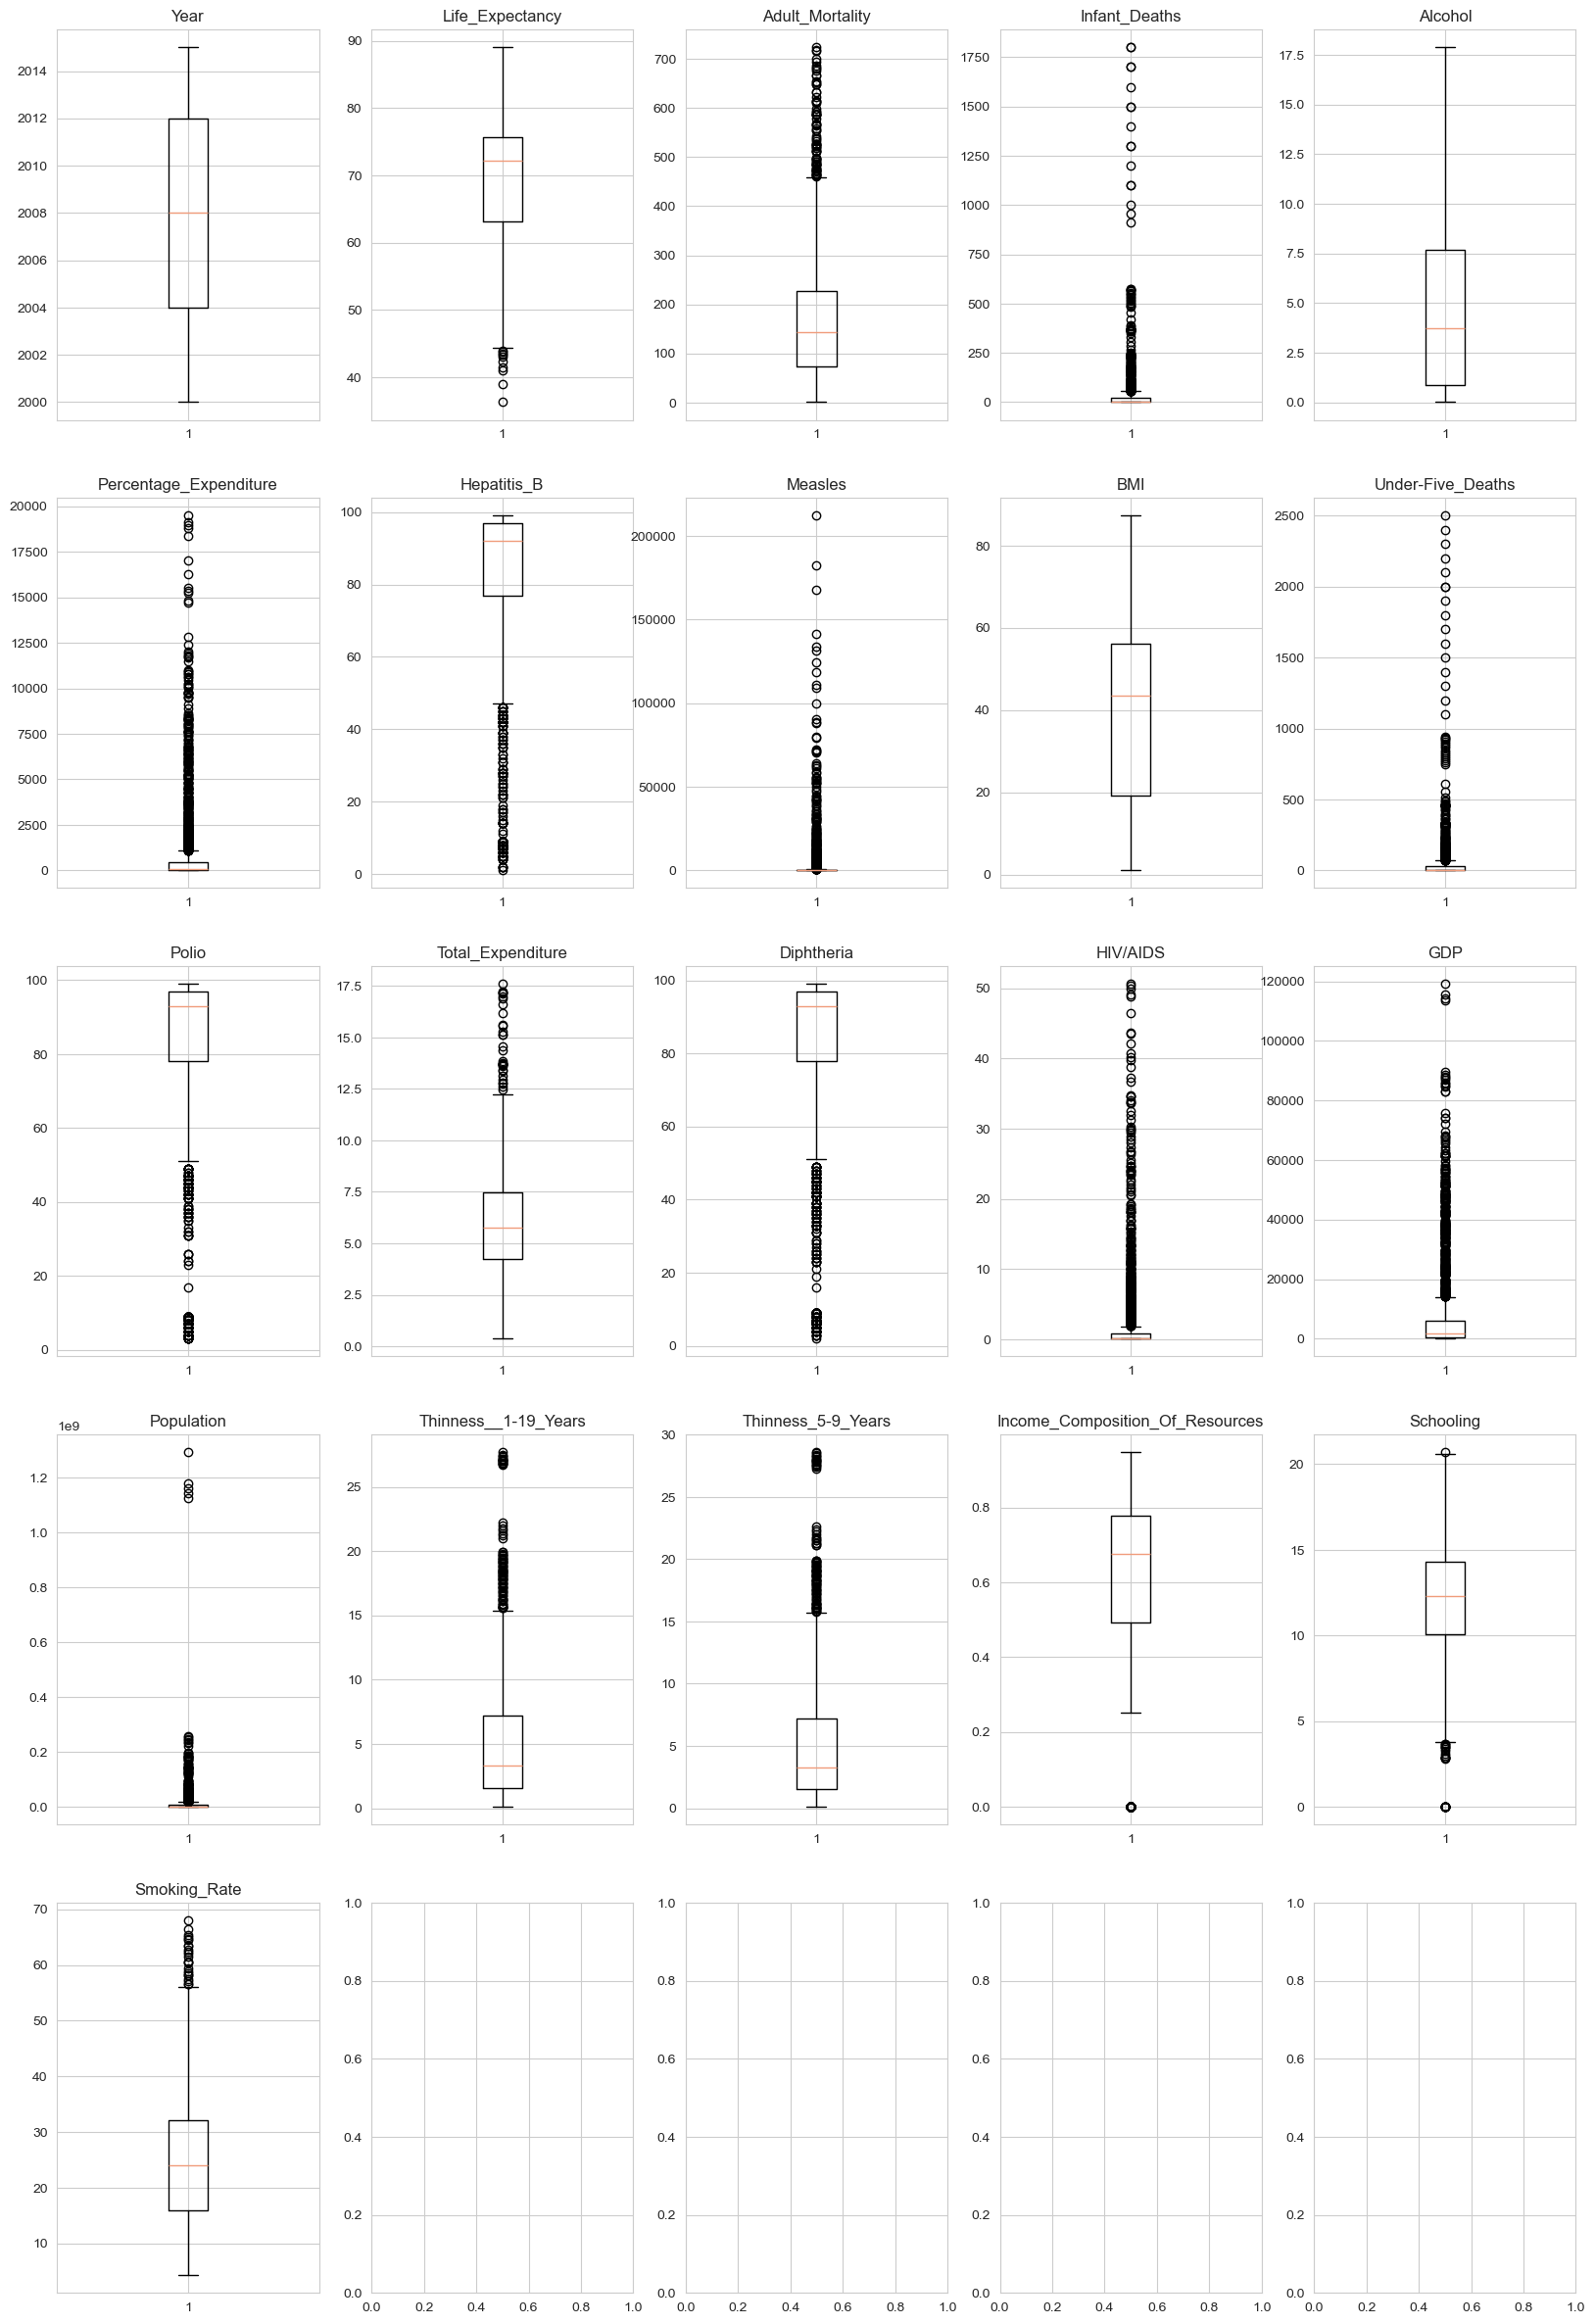

In [11]:
# Visualize boxplots for each numeric column to identify outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(data[column].dropna())
    axes[i].set_title(column)
    axes[i].grid(True)

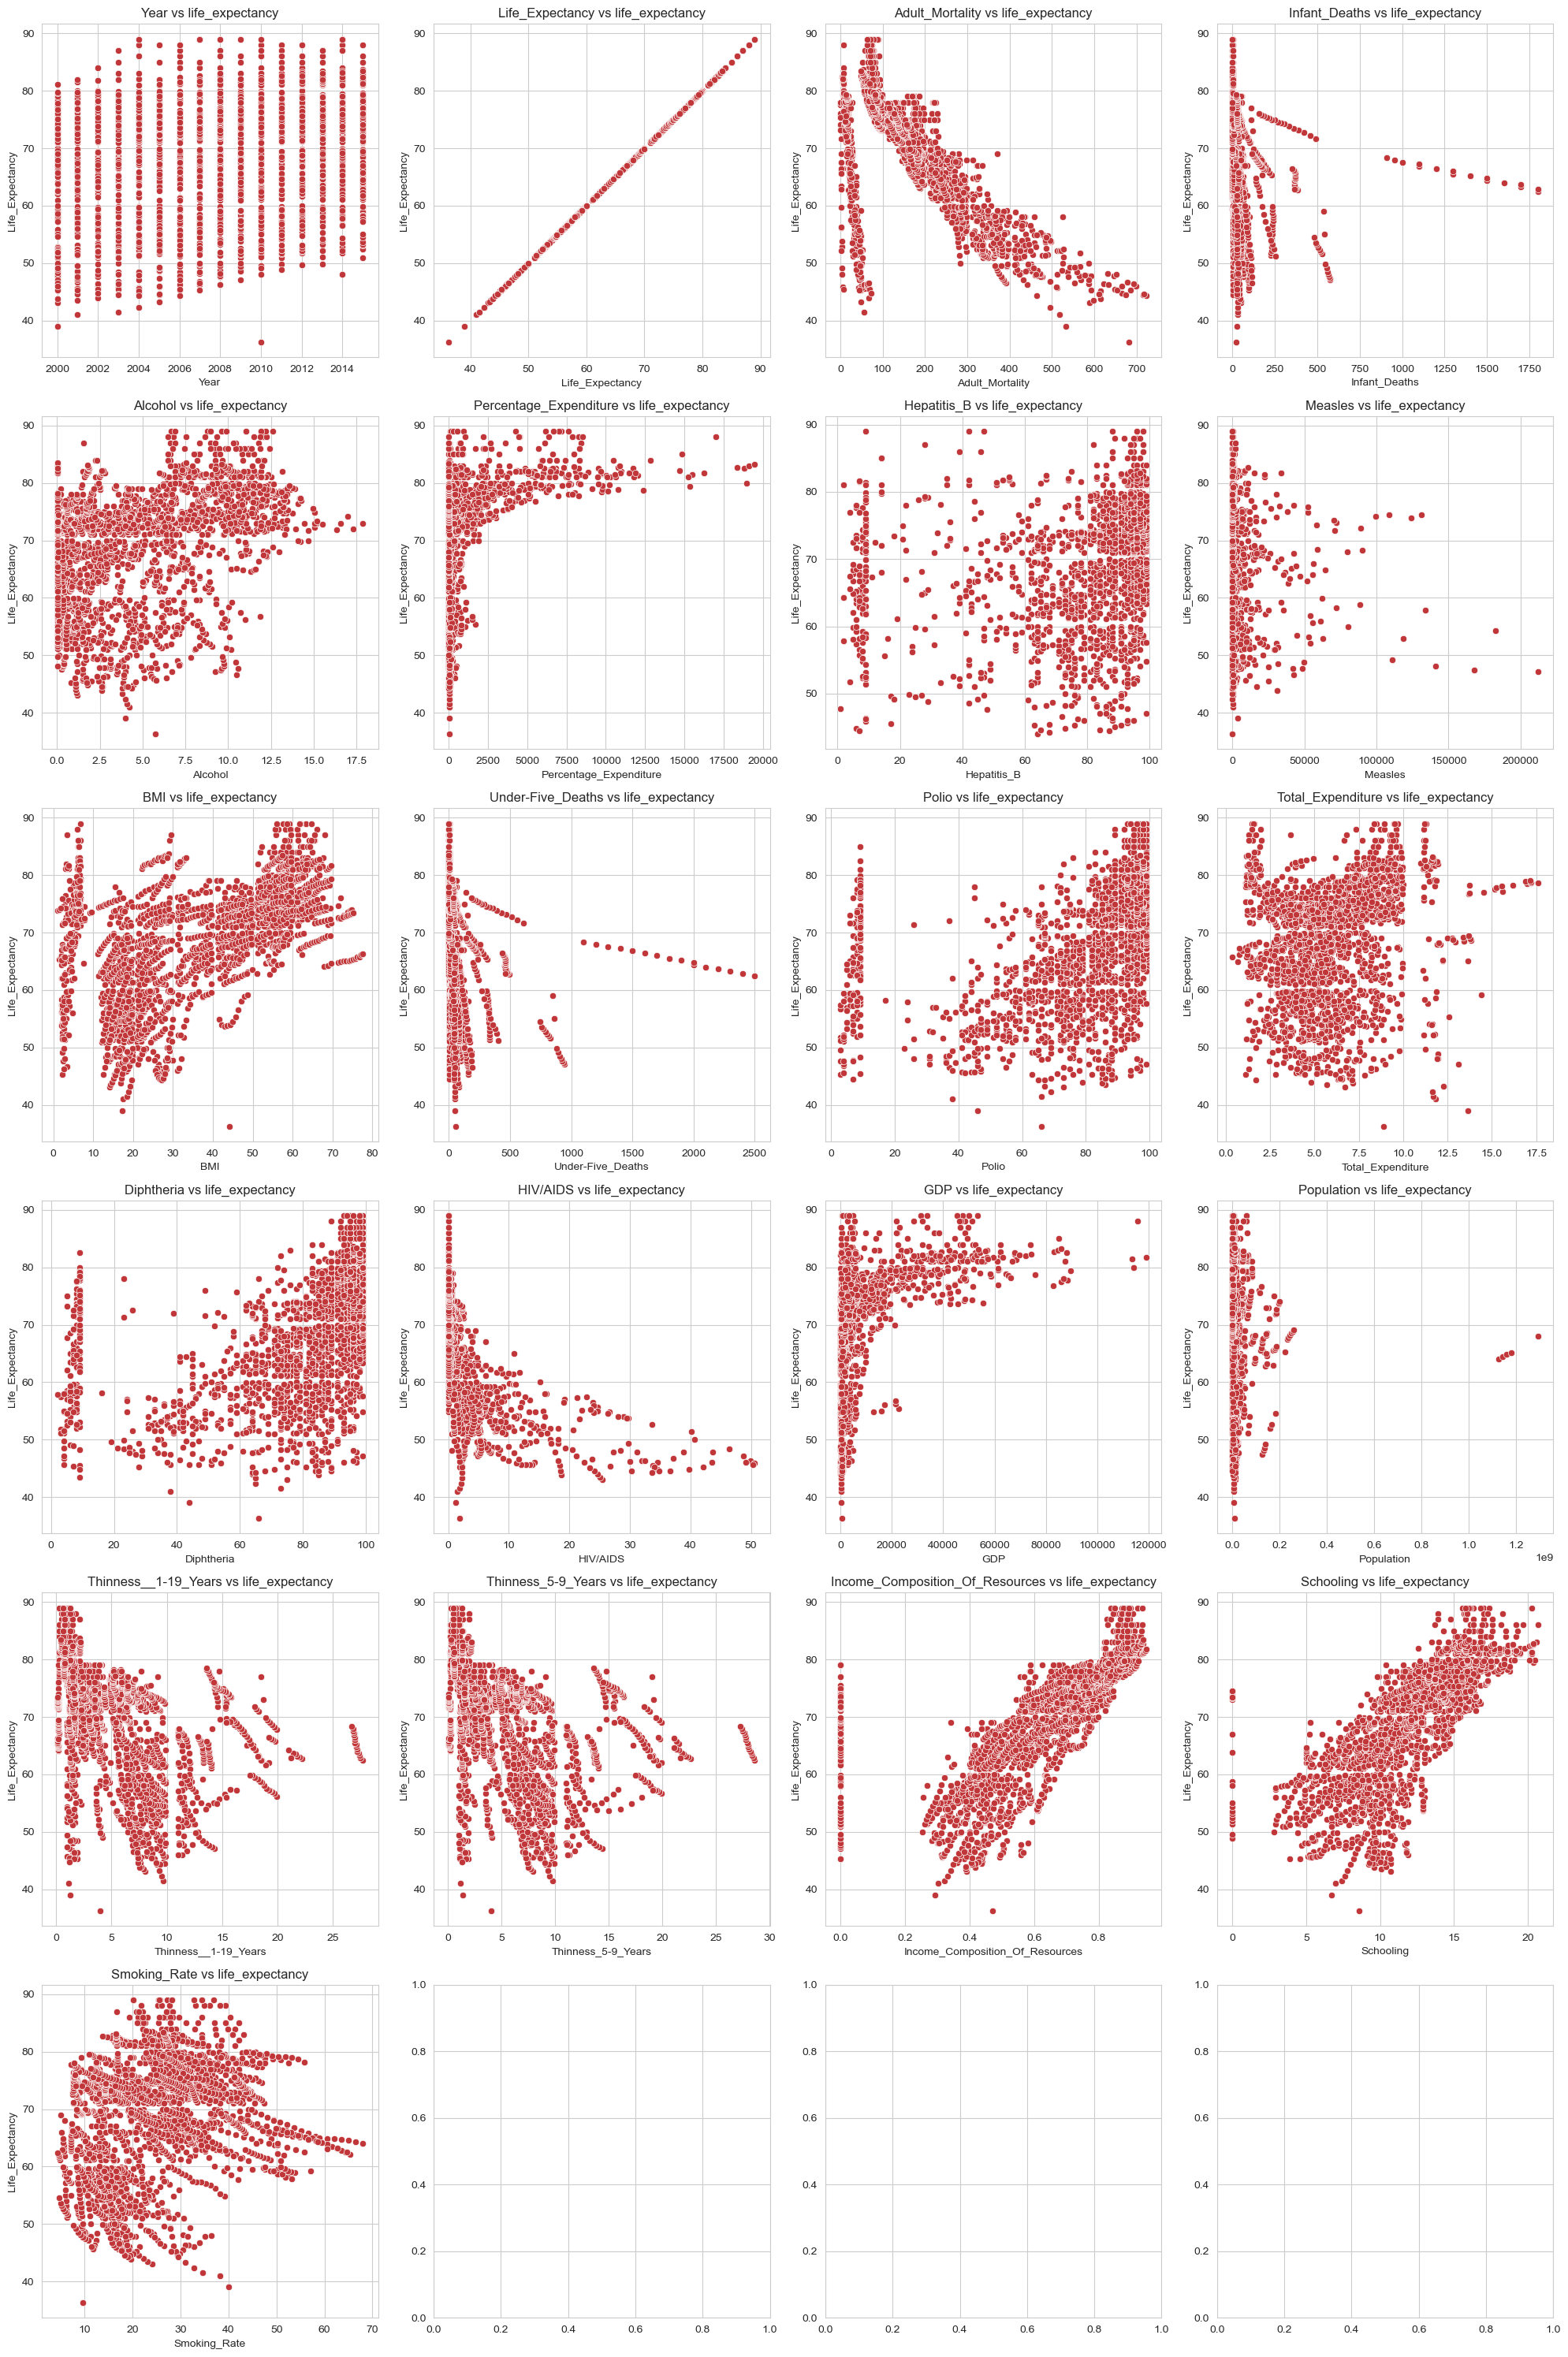

In [12]:
# Scatter plots for numeric columns vs Life Expectancy
num_rows = (len(numeric_columns) + 4 - 1) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.scatterplot(data=data, x=col, y="Life_Expectancy", ax=axes[i])
    axes[i].set_title(f'{col} vs life_expectancy')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<Axes: >

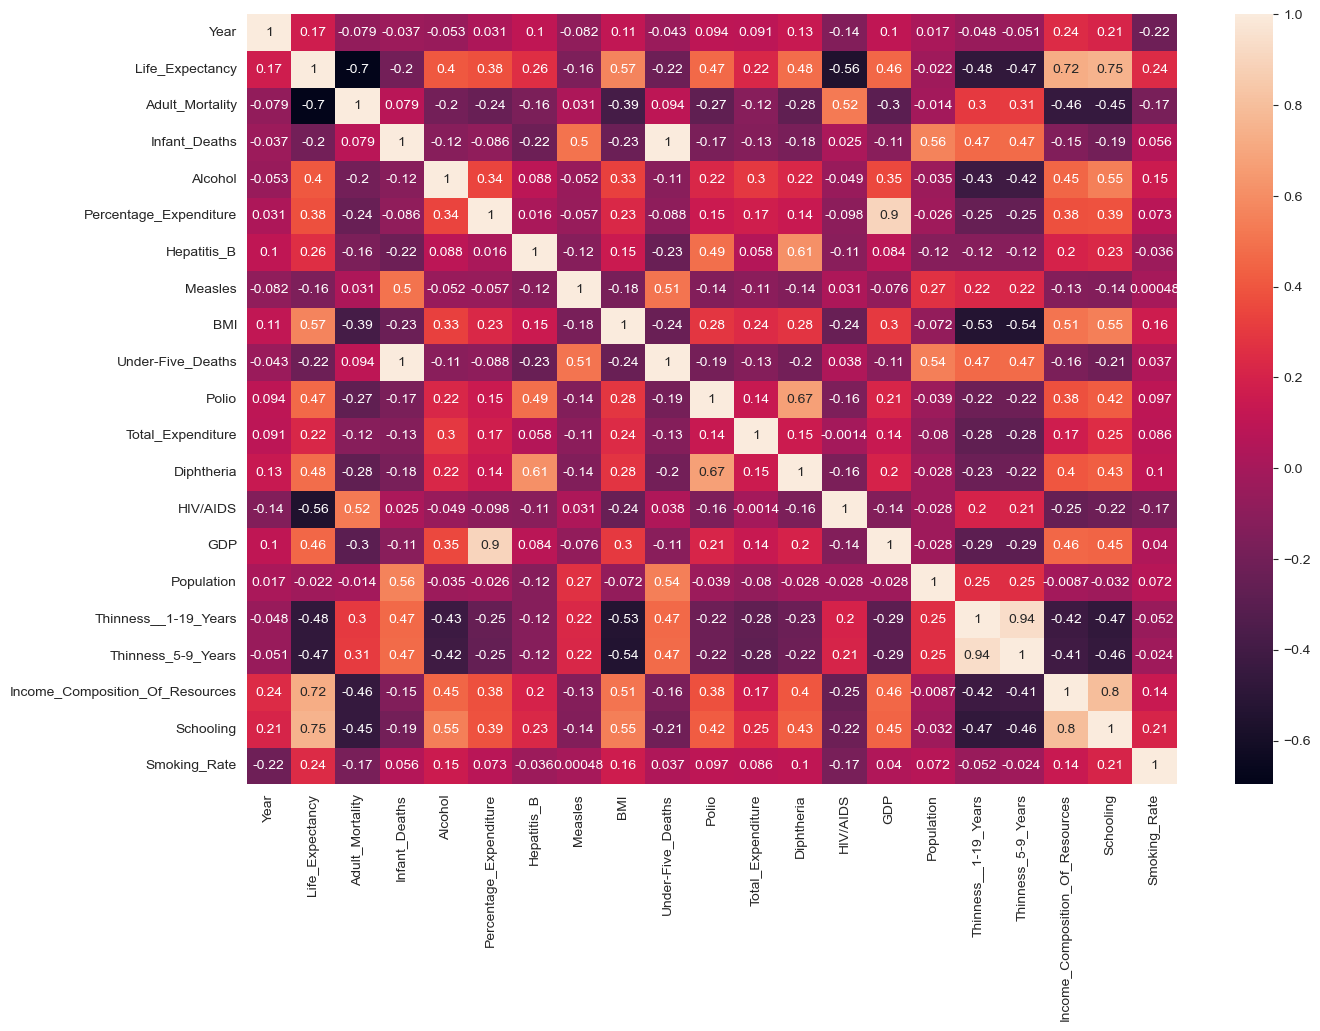

In [13]:
# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include="number").corr(), annot=True)

## Step 3: Data Preprocessing and Feature Selection

Categorical variables are encoded into numerical values to ensure compatibility with machine learning algorithms. Missing values are addressed using median imputation for select features and K-Nearest Neighbors (KNN) imputation for the remaining numeric columns. Low-variance features are eliminated using a predefined threshold, and highly correlated features are removed to mitigate multicollinearity and improve model generalization.

In [16]:
# Convert categorical variables to dummy/indicator variables
data.replace({'Developed':1, 'Developing':0}, inplace=True)

In [17]:
# Fill missing values for selected columns with median
for column in ["BMI", "Polio", "Income_Composition_Of_Resources"]:
    data[column].fillna(data[column].median(), inplace=True)

In [18]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Impute remaining missing values using KNN Imputer
imputer = KNNImputer()
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
print("Remaining missing values:\n", data.isnull().sum())

Remaining missing values:
 Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under-Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness__1-19_Years               0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
Smoking_Rate                       0
dtype: int64


In [19]:
data = data.drop(labels=['Country'], axis=1)

# Removing features with very low variance
threshold = 0.01
selector = VarianceThreshold(threshold)
selector.fit(data)

# Get the indices of the non-constant features
relevant_features = selector.get_support(indices=True)

# Selecting features that exceed the variance threshold
data_relevant = data.iloc[:, relevant_features]

In [20]:
# Compute absolute correlation matrix
correlation_matrix = data_relevant.corr().abs()

# Masking the upper triangle to avoid duplicate correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_correlation = correlation_matrix.mask(mask)

# Find highly correlated features with a correlation threshold
correlation_threshold = 0.85
highly_correlated_features = np.where(masked_correlation > correlation_threshold)

# Print the highly correlated feature pairs
for i, j in zip(highly_correlated_features[0], highly_correlated_features[1]):
    print(f"Features {data_relevant.columns[i]} and {data_relevant.columns[j]} are highly correlated.")

Features Under-Five_Deaths and Infant_Deaths are highly correlated.
Features GDP and Percentage_Expenditure are highly correlated.
Features Thinness_5-9_Years and Thinness__1-19_Years are highly correlated.


In [21]:
# Drop highly correlated features based on correlation analysis
data = data.drop(['Infant_Deaths', 'Percentage_Expenditure', 'Thinness_5-9_Years'], axis=1)

In [22]:
# Define function to identify outliers using IQR method
def outlier_count(col, data=data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [23]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    outlier_count(col, data)

---------------Year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Status---------------
Number of outliers: 512
Percent of data that is outlier: 17.43%
---------------Life_Expectancy---------------
Number of outliers: 12
Percent of data that is outlier: 0.41%
---------------Adult_Mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------Alcohol---------------
Number of outliers: 1
Percent of data that is outlier: 0.03%
---------------Hepatitis_B---------------
Number of outliers: 252
Percent of data that is outlier: 8.58%
---------------Measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Under-Five_Deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Number of outliers: 279
Percent of data 

In [24]:
from scipy.stats.mstats import winsorize
winsorized_Life_Expectancy = winsorize(data['Life_Expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(data['Adult_Mortality'],(0,0.03))
winsorized_Percentage_Exp = winsorize(data['Total_Expenditure'],(0,0.1))
winsorized_Measles = winsorize(data['Measles'],(0,0.19))
winsorized_Under_Five_Deaths = winsorize(data['Under-Five_Deaths'],(0,0.01))
winsorized_HIV = winsorize(data['HIV/AIDS'],(0,0.1))
winsorized_GDP = winsorize(data['GDP'],(0,0.01))
winsorized_Income_Comp_Of_Resources = winsorize(data['Income_Composition_Of_Resources'],(0.05,0))
winsorized_Schooling = winsorize(data['Schooling'],(0.02,0.01))
winsorized_Smoking_Rate = winsorize(data['Smoking_Rate'],(0,0.05))

In [25]:
data['Life_Expectancy'] = winsorized_Life_Expectancy
data['Adult_Mortality'] = winsorized_Adult_Mortality
data['Under-Five_Deaths'] = winsorized_Under_Five_Deaths
data['Total_Expenditure'] = winsorized_Percentage_Exp
data['HIV/AIDS'] = winsorized_HIV
data['GDP'] = winsorized_GDP
data['Income_Composition_Of_Resources'] = winsorized_Income_Comp_Of_Resources
data['Schooling'] = winsorized_Schooling
data['Smoking_Rate'] = winsorized_Smoking_Rate

In [26]:
numeric = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric:
    outlier_count(col, data)

---------------Year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Status---------------
Number of outliers: 512
Percent of data that is outlier: 17.43%
---------------Life_Expectancy---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Adult_Mortality---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Alcohol---------------
Number of outliers: 1
Percent of data that is outlier: 0.03%
---------------Hepatitis_B---------------
Number of outliers: 252
Percent of data that is outlier: 8.58%
---------------Measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Under-Five_Deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Number of outliers: 279
Percent of data that

In [27]:
# Split data into training and testing sets
train, test =  train_test_split(data, test_size = 0.2, random_state = 42)

In [28]:
def fill_train_with_median():
    return train.fillna(train.median(numeric_only = True))

def fill_test_with_median():
    return test.fillna(train.median(numeric_only = True))

# Apply functions to data
train = fill_train_with_median() 
test = fill_test_with_median()

In [29]:
# Split data into features (X) and target (y) for training and testing
X_train = train.drop(columns=['Life_Expectancy'])
y_train = train["Life_Expectancy"]

X_test = test.drop(columns=['Life_Expectancy'])
y_test = test["Life_Expectancy"]

In [30]:
# Scale feature data using MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [31]:
# Initialize an empty DataFrame to store model performance metrics
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score', 'MSE', 'MAE'])

# Function to train, evaluate, and log performance of a model
def select_model(model, model_name):
    global Modeling  # Access the global DataFrame
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Calculate training R2 score
    train_score = model.score(X_train, y_train)
    print(f"R2 score of {model_name} on training data: {train_score}")
    
    # Make predictions on the test data
    y_predicted = model.predict(X_test)
    
    # Calculate evaluation metrics
    test_r2_score = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    
    print(f"R2 score of {model_name} on test data: {test_r2_score}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}\n")
    
    # Append the results to the global DataFrame
    model_scores = pd.DataFrame({
        'Model': [model_name],
        'Training Score': [train_score],
        'Test R2 Score': [test_r2_score],
        'MSE': [mse],
        'MAE': [mae]
    })

    results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_predicted
    })

    print(results_df.head(10))
    
    Modeling = pd.concat([Modeling, model_scores], ignore_index=True)

    # Plot results
    comparison_plot = ModelComparisonPlot(model_name)
    comparison_plot.plot_comparison(y_test, y_predicted, mse, mae, test_r2_score)
    
    return model

In [32]:
# Class to plot model comparison results
class ModelComparisonPlot:
    def __init__(self, model_name):
        self.model_name = model_name
    
    def plot_comparison(self, y_val, y_pred, mse, mae, r2):
        # Create figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot 1: Predicted vs True Values
        sns.regplot(x=y_val, y=y_pred, ax=axes[0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
        axes[0].set_xlabel('True Values')
        axes[0].set_ylabel('Predicted Values')
        axes[0].set_title(f'Predicted vs True Values\nMSE: {mse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}')
        axes[0].grid(True)
        
        # Plot 2: Residual Plot
        residuals = y_val - y_pred
        sns.residplot(x=y_pred, y=residuals, lowess=True, ax=axes[1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
        axes[1].set_xlabel('Predicted Values')
        axes[1].set_ylabel('Residuals')
        axes[1].set_title('Residual Plot')
        axes[1].axhline(y=0, color='red', linestyle='--')
        axes[1].grid(True)
        
        # Show plot
        fig.suptitle(f'{self.model_name} Model Performance', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


R2 score of Linear Regression on training data: 0.8538192948834855
R2 score of Linear Regression on test data: 0.856611754868268
Mean Squared Error (MSE): 12.259580857810876
Mean Absolute Error (MAE): 2.6507807499362954

   Actual  Predicted
0    81.4  79.668249
1    76.3  78.498080
2    69.0  71.989554
3    74.7  76.244141
4    72.0  74.495937
5    78.9  76.822582
6    75.1  77.910206
7    64.6  63.114058
8    74.9  67.044423
9    69.1  70.707882


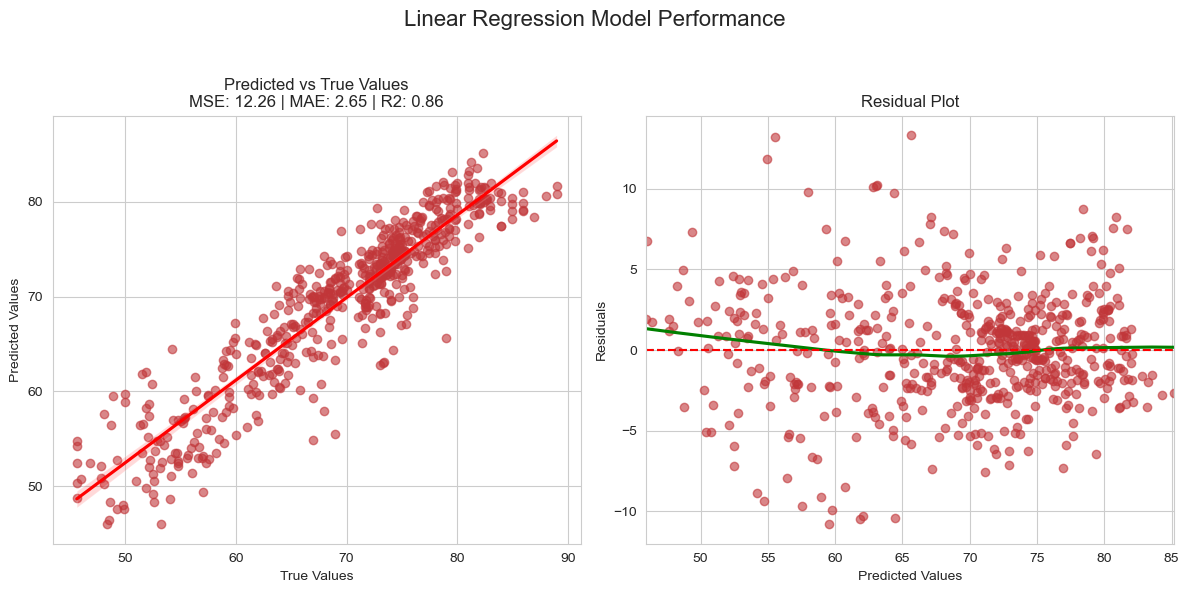

LinearRegression()

In [33]:
linear_model = LinearRegression()
select_model(linear_model, 'Linear Regression')

Feature Importance (Linear Regression):
Schooling                           8.030254
Income_Composition_Of_Resources     7.123875
GDP                                 2.612025
Diphtheria                          2.028570
Status                              1.313745
Alcohol                             1.207277
Polio                               1.187017
BMI                                 0.751175
Total_Expenditure                   0.743318
Year                                0.476575
Population                         -0.451561
Hepatitis_B                        -0.592861
Thinness__1-19_Years               -1.518907
Smoking_Rate                       -1.816075
Under-Five_Deaths                  -2.265359
Measles                            -2.530856
Adult_Mortality                    -6.962463
HIV/AIDS                          -11.330859
dtype: float64


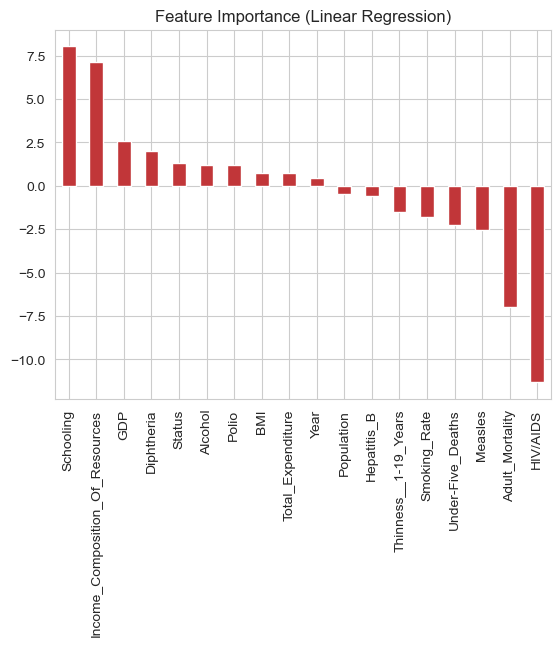

In [34]:
feature_names = train.drop(columns=['Life_Expectancy']).columns

# Function to plot feature importance
def plot_feature_importance(feature_importance, title):
    feature_importance.sort_values(ascending=False).plot(kind='bar', title=title)
    plt.show()

# 1. Linear Regression - Feature Importance (based on coefficients)
def linear_regression_feature_importance():
    coefficients = pd.Series(linear_model.coef_, index=feature_names)
    print("Feature Importance (Linear Regression):")
    print(coefficients.sort_values(ascending=False))
    plot_feature_importance(coefficients, "Feature Importance (Linear Regression)")

linear_regression_feature_importance()

R2 score of SVR on training data: 0.9316695645052299
R2 score of SVR on test data: 0.9251997495459434
Mean Squared Error (MSE): 6.395361891649756
Mean Absolute Error (MAE): 1.7732999847782909

   Actual  Predicted
0    81.4  79.859352
1    76.3  78.880125
2    69.0  69.682168
3    74.7  75.196469
4    72.0  72.705589
5    78.9  77.434613
6    75.1  77.450105
7    64.6  62.441626
8    74.9  72.125886
9    69.1  71.642254


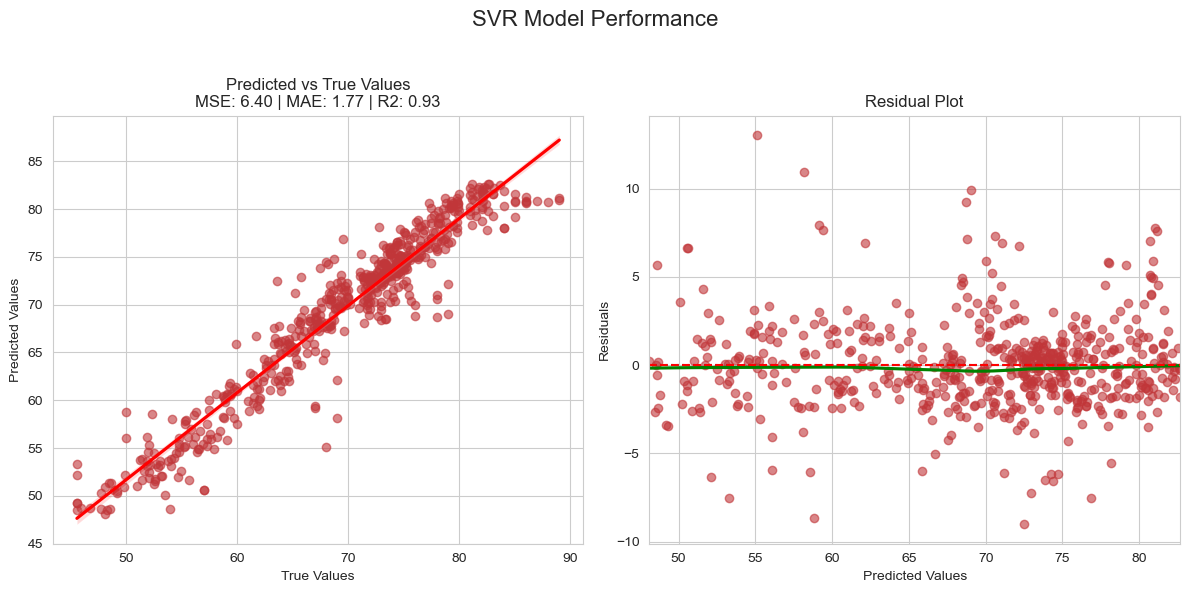

SVR(C=9.0, epsilon=0.9)

In [35]:
svr_model = SVR(C = 9.0, epsilon = 0.9, kernel = 'rbf')
select_model(svr_model, "SVR")

Feature Importance (SVR - Permutation Importance):
Adult_Mortality                    0.360165
HIV/AIDS                           0.108841
Income_Composition_Of_Resources    0.077107
Status                             0.040337
Schooling                          0.033135
Thinness__1-19_Years               0.014390
GDP                                0.011578
Smoking_Rate                       0.010155
BMI                                0.009427
Diphtheria                         0.008778
Alcohol                            0.008383
Year                               0.008107
Total_Expenditure                  0.005908
Polio                              0.005169
Under-Five_Deaths                  0.003652
Hepatitis_B                        0.002640
Population                         0.000448
Measles                            0.000268
dtype: float64


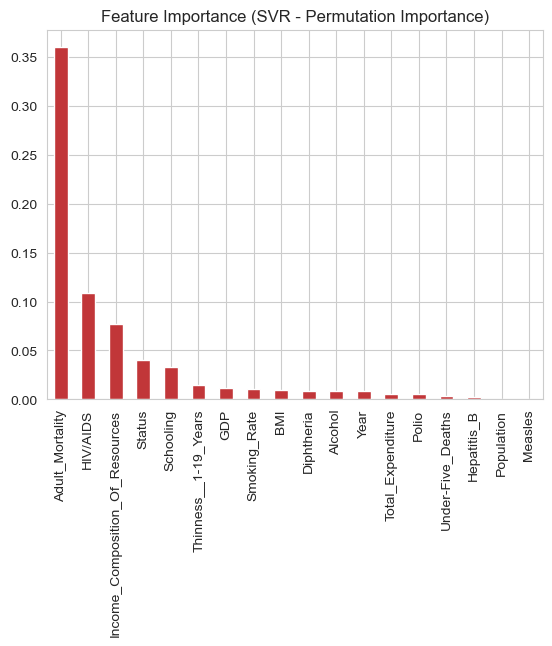

In [36]:
# 2. SVR - Feature Importance (using permutation importance)
def svr_feature_importance():
    result = permutation_importance(svr_model, X_test, y_test, n_repeats=10, random_state=42)
    perm_importance = pd.Series(result.importances_mean, index=feature_names)
    print("Feature Importance (SVR - Permutation Importance):")
    print(perm_importance.sort_values(ascending=False))
    plot_feature_importance(perm_importance, "Feature Importance (SVR - Permutation Importance)")

svr_feature_importance()

R2 score of Random Forest Regressor on training data: 0.9696763817111765
R2 score of Random Forest Regressor on test data: 0.9513225657970485
Mean Squared Error (MSE): 4.161881889366863
Mean Absolute Error (MAE): 1.4104555363255478

   Actual  Predicted
0    81.4  82.784725
1    76.3  76.965572
2    69.0  69.117344
3    74.7  74.470584
4    72.0  72.233617
5    78.9  77.415946
6    75.1  75.887173
7    64.6  65.553491
8    74.9  72.782529
9    69.1  70.025757


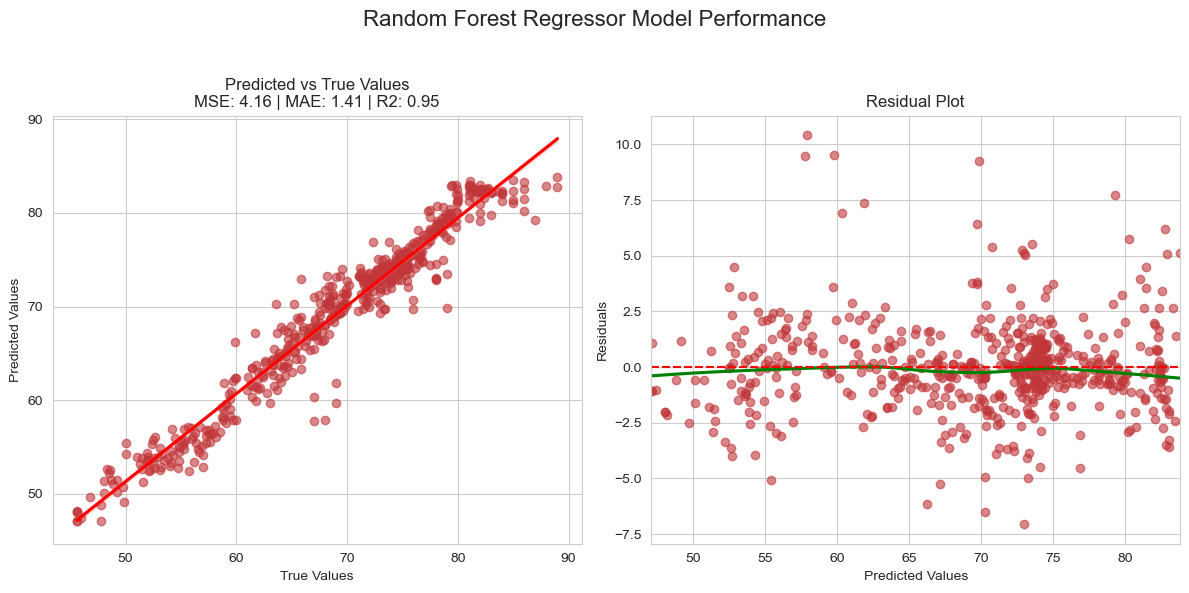

RandomForestRegressor(max_depth=7, min_samples_split=5)

In [37]:
random_forest_regressor_model = RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5)
select_model(random_forest_regressor_model, "Random Forest Regressor")

Feature Importance (Random Forest Regressor):
HIV/AIDS                           0.620674
Income_Composition_Of_Resources    0.149802
Adult_Mortality                    0.139198
Schooling                          0.021354
Under-Five_Deaths                  0.020889
Thinness__1-19_Years               0.009994
BMI                                0.008124
Year                               0.005625
Alcohol                            0.005282
GDP                                0.004459
Polio                              0.004051
Smoking_Rate                       0.002931
Total_Expenditure                  0.001764
Diphtheria                         0.001643
Measles                            0.001481
Population                         0.001414
Hepatitis_B                        0.001156
Status                             0.000159
dtype: float64


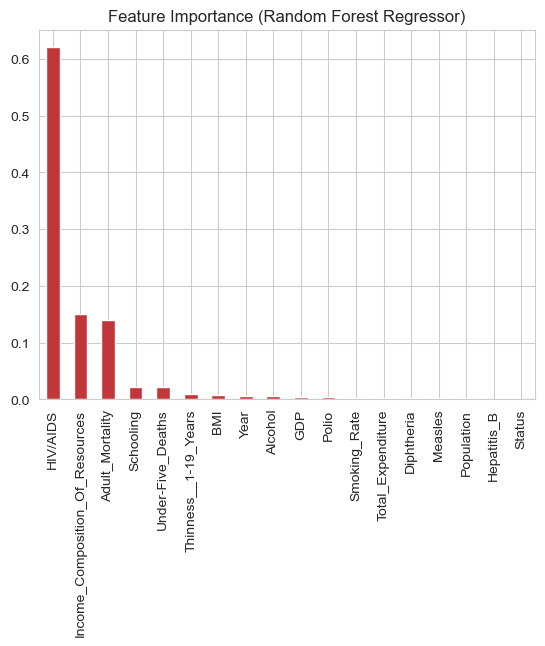

In [38]:
# 3. Random Forest Regressor - Feature Importance
def random_forest_feature_importance():
    feature_importance = pd.Series(random_forest_regressor_model.feature_importances_, index=feature_names)
    print("Feature Importance (Random Forest Regressor):")
    print(feature_importance.sort_values(ascending=False))
    plot_feature_importance(feature_importance, "Feature Importance (Random Forest Regressor)")

random_forest_feature_importance()

R2 score of Gradient Boosting Regressor on training data: 0.9952469467369918
R2 score of Gradient Boosting Regressor on test data: 0.9670188069516175
Mean Squared Error (MSE): 2.8198657609084337
Mean Absolute Error (MAE): 1.1143248269864106

   Actual  Predicted
0    81.4  82.442273
1    76.3  76.021355
2    69.0  70.186999
3    74.7  74.851862
4    72.0  73.353730
5    78.9  76.923445
6    75.1  75.964346
7    64.6  64.940481
8    74.9  73.653146
9    69.1  70.759155


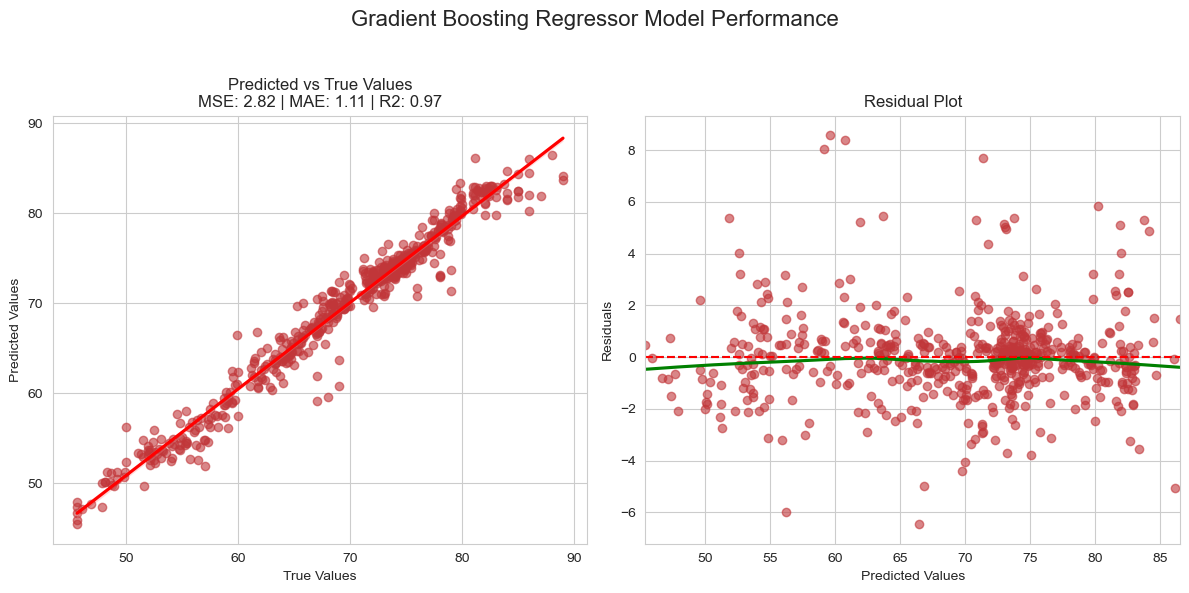

GradientBoostingRegressor(max_depth=6, min_samples_split=5)

In [39]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5)
select_model(gradient_boosting_regressor, "Gradient Boosting Regressor")

Feature Importance (Gradient Boosting Regressor):
HIV/AIDS                           0.599677
Income_Composition_Of_Resources    0.165949
Adult_Mortality                    0.130624
Under-Five_Deaths                  0.028827
Schooling                          0.017163
Thinness__1-19_Years               0.010924
Alcohol                            0.007712
Year                               0.007598
BMI                                0.005321
GDP                                0.005124
Smoking_Rate                       0.004828
Polio                              0.004153
Total_Expenditure                  0.003708
Diphtheria                         0.002679
Population                         0.002270
Hepatitis_B                        0.001721
Measles                            0.001122
Status                             0.000601
dtype: float64


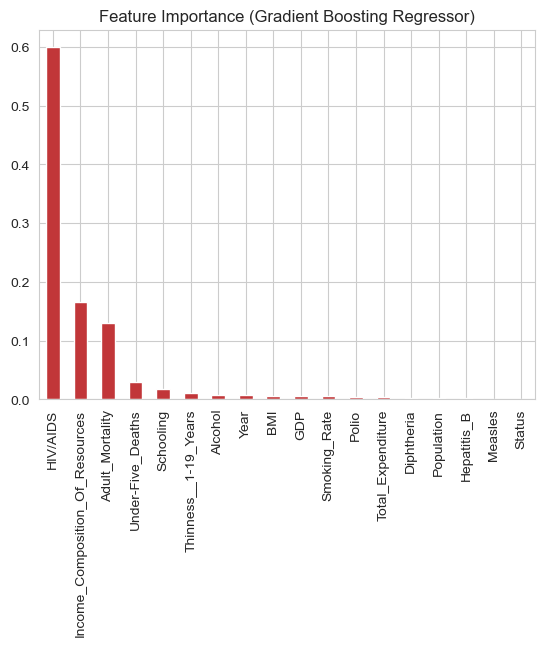

In [41]:
def gradient_boosting_feature_importance():
    feature_importance = pd.Series(gradient_boosting_regressor.feature_importances_, index=feature_names)
    print("Feature Importance (Gradient Boosting Regressor):")
    print(feature_importance.sort_values(ascending=False))
    plot_feature_importance(feature_importance, "Feature Importance (Gradient Boosting Regressor)")

gradient_boosting_feature_importance()

In [47]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, param_grid, model_name, cv=5, scoring='r2'):
    """
    Perform hyperparameter tuning using GridSearchCV.
    
    Parameters:
        model (sklearn estimator): The model instance (e.g., GradientBoostingRegressor()).
        param_grid (dict): Dictionary of hyperparameters to search.
        model_name (str): Name for display/logging.
        cv (int): Number of cross-validation folds.
        scoring (str): Scoring metric (e.g., 'r2', 'neg_mean_squared_error').
        
    Returns:
        best_estimator: Model with best found parameters.
    """
    print(f"\n🔍 Tuning {model_name} using GridSearchCV...")
    search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    search.fit(X_train, y_train)
    
    print(f"✅ Best Parameters for {model_name}: {search.best_params_}")
    print(f"📊 Best Cross-Validated {scoring.upper()} Score: {search.best_score_:.4f}")
    
    return search.best_estimator_


🔍 Tuning Gradient Boosting Regressor using GridSearchCV...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}
📊 Best Cross-Validated R2 Score: 0.9615
R2 score of Tuned Gradient Boosting Regressor on training data: 0.9986528246882046
R2 score of Tuned Gradient Boosting Regressor on test data: 0.9680638562524665
Mean Squared Error (MSE): 2.730514877282039
Mean Absolute Error (MAE): 1.0889464801352142

   Actual  Predicted
0    81.4  82.473883
1    76.3  75.426783
2    69.0  70.182914
3    74.7  74.650996
4    72.0  73.357063
5    78.9  77.628110
6    75.1  75.705127
7    64.6  64.858450
8    74.9  74.051184
9    69.1  70.290472


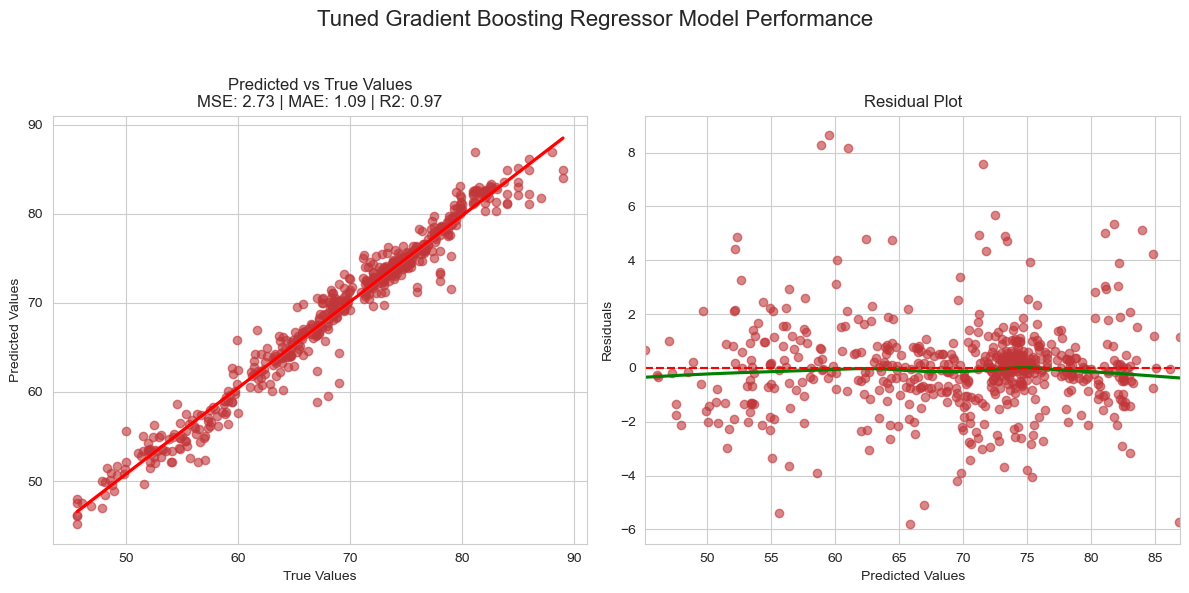

GradientBoostingRegressor(max_depth=6, n_estimators=200)

In [85]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 6, 7],
    'min_samples_split': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Tune and get the best model
best_gbr = tune_model(gbr, param_grid, "Gradient Boosting Regressor")
# Use the tuned model with your existing evaluation function
select_model(best_gbr, "Tuned Gradient Boosting Regressor")

R2 score of Tuned Gradient Boosting Regressor on training data: 0.9986170228295458
R2 score of Tuned Gradient Boosting Regressor on test data: 0.9678674286881804
Mean Squared Error (MSE): 2.747309277721595
Mean Absolute Error (MAE): 1.0889034016973318

   Actual  Predicted
0    81.4  82.495819
1    76.3  75.539701
2    69.0  70.200324
3    74.7  74.809159
4    72.0  73.345246
5    78.9  77.661802
6    75.1  75.737491
7    64.6  64.802802
8    74.9  74.323557
9    69.1  70.334328


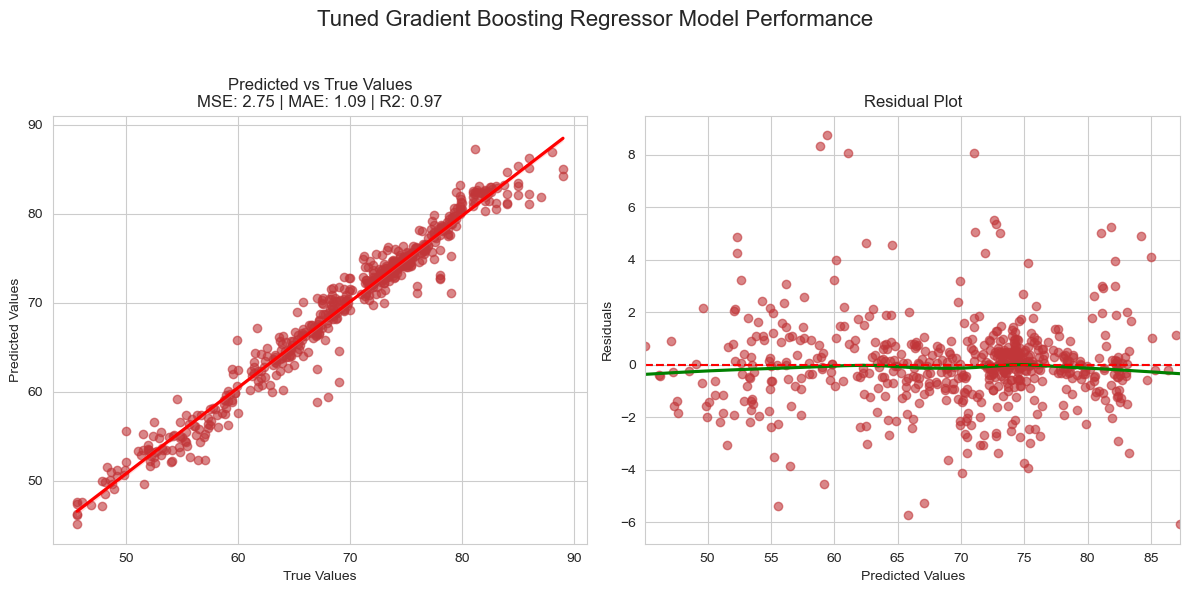

In [50]:
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 6, min_samples_split = 2, learning_rate=0.1)
gbr_tuned = select_model(gbr, "Tuned Gradient Boosting Regressor")

In [52]:
import joblib
joblib.dump(gbr_tuned, 'model.pkl')

['model.pkl']

In [46]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [46]:
import sklearn
print(sklearn.__version__)

1.4.2
